In [30]:
#import libraries
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

In [31]:
#import data
xls_file = pd.ExcelFile('C:\\Users\\sonja tilly.ABERDEEN\\data010817.xlsx')

**Prep data**

In [32]:
#parse sheet
data = xls_file.parse('data')
data.index = data['Date']
del data['Date']


In [33]:
#address data lags

def Shift(indicator, d):
    indicator.shift(d)
    return

data['CPI YOY Index'] = data['CPI YOY Index'].shift(11)
data['FDIDFDMO Index'] = data['FDIDFDMO Index'].shift(10)
data['USURTOT Index'] = data['NFP TCH Index'].shift(4)
data['NFP TCH Index'] = data['NFP TCH Index'].shift(4)
data['USEMNCHG Index'] = data['USEMNCHG Index'].shift(4)
data['IP CHNG Index'] = data['IP CHNG Index'].shift(17)
data['MTIBCHNG Index'] = data['MTIBCHNG Index'].shift(15)
data['MGT2TB Index'] = data['MGT2TB Index'].shift(15)
data['OUTFGAF Index'] = data['OUTFGAF Index'].shift(17)
data['USHBMIDX Index'] = data['USHBMIDX Index'].shift(15)
data['CONCCONF Index'] = data['CONCCONF Index'].shift(29)
data['RSTAMOM Index'] = data['RSTAMOM Index'].shift(15)
data['USTBTOT Index'] = data['USTBTOT Index'].shift(4)
data['CONSSENT Index'] = data['CONSSENT Index'].shift(18)
data['CICRTOT Index'] = data['CICRTOT Index'].shift(7)
data['SPE AUTO Index'] = data['SPE AUTO Index'].shift(30)
data['SPE CARD Index'] = data['SPE AUTO Index'].shift(30)
data['GDP CYOY Index'] = data['GDP CYOY Index'].shift(30)

data = data.fillna(0)
data.head(1)

,FDTR Index,VIX Index,USTW$ Index,USGG10YR Index,USGG30YR Index,USGG5YR Index,USYC2Y10 Index,USYC2Y30 Index,USYC5Y10 Index,USYC2Y5Y Index,CPI YOY Index,FDIDFDMO Index,USURTOT Index,NFP TCH Index,USEMNCHG Index,IP CHNG Index,MTIBCHNG Index,MGT2TB Index,PIDSPINX Index,NAPMPMI Index,OUTFGAF Index,USGGBE10 Index,USHBMIDX Index,CONCCONF Index,OEUSKLAR Index,RSTAMOM Index,USTBTOT Index,FDDSGDP Index,M2% YOY Index,CLA Comdty,CONSSENT Index,PIDSDPS Index,CICRTOT Index,ARDIMOYY Index,M1% YOY Index,SCGRRAI Index,EMB US Equity,SPE AUTO Index,SPE CARD Index,BFCIUS Index,INJCJMOM Index,LEI CHNG Index,GDP CYOY Index,SLDETIGT Index,SLDETGTS Index,GFSIFFND Index,XLF US Equity,XLE US Equity,XLK US Equity,XLV US Equity,XLI US Equity,XLY US Equity,XLB US Equity,CDX HY CDSI GEN 5Y SPRD Corp,LF98OAS Index
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-12-31,5.25,20.92,88.4869,6.418,6.642,6.21,54.15,66.4,20.8,33.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7496.1,55.2,0.0,0.0,0.0,0.0,73.0711,0.0,0.0,-1.3,4.9,0.0,0.0,5.7,0.0,4.02,-4.1,0.0,0.0,0.0,0.0,0.761,7.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.88


**Transform features**

In [34]:
#convert index to datetime object
data.index = pd.to_datetime(data.index)


In [35]:
# these are the transformations applied to each indicator
# the transformations of the n variables create n new columns of the transformed variable which then run through the classifiers
# add zscore formula to LevelChange and PctChange

from scipy import stats

window = [90, 180, 360]

def LevelChange (indicator, window): #calculate the monthly change in the indicator, window expressed in Months
    days=int(window)
    data[str(indicator)+' change in '+str(window)+'ds']=data[indicator]-data[indicator].shift(days)
    data[str(indicator)+' change in '+str(window)+'ds' +'zscore']=stats.zscore(data[indicator], axis=None)
    
def PctChange (indicator,window): #calculate the monthly percentage change in the indicator, window expressed in Months
    days=int(window)
    data[str(indicator)+' %change in '+str(window)+'ds']=data[indicator]/data[indicator].shift(days)-1
    data[str(indicator)+' change in '+str(window)+'ds' +'zscore']=stats.zscore(data[indicator], axis=None)
    
def Zscore (indicator,window):  # calculate a Z score over a number of trading days
    mean=data[indicator].rolling(window).mean()
    std=data[indicator].rolling(window).std()
    data[str(indicator)+str(window)+'zscore']=(data[indicator]-mean)/std
 

In [36]:
cols = list(data.columns)

for i in window:
    for col in cols:
        Zscore (col,i)


In [37]:
for i in window:
    LevelChange('FDTR Index', i)
    LevelChange('CPI YOY Index', i)
    LevelChange('IP CHNG Index', i)
    LevelChange('MGT2TB Index', i)
    LevelChange('NAPMPMI Index', i)
    LevelChange('OUTFGAF Index', i)
    LevelChange('USGGBE10 Index', i)
    LevelChange('USHBMIDX Index', i)
    LevelChange('CONCCONF Index', i)
    LevelChange('OEUSKLAR Index', i)
    LevelChange('FDDSGDP Index', i)
    LevelChange('M2% YOY Index', i)
    LevelChange('CONSSENT Index', i)
    LevelChange('PIDSDPS Index', i)
    LevelChange('CICRTOT Index', i)
    LevelChange('M1% YOY Index', i)
    LevelChange('SCGRRAI Index', i)
    LevelChange('LEI CHNG Index', i)
    LevelChange('GDP CYOY Index', i)
    LevelChange('GFSIFFND Index', i)
    LevelChange('CDX HY CDSI GEN 5Y SPRD Corp', i)
    LevelChange('LF98OAS Index', i)

In [38]:
for i in window:
    PctChange('VIX Index',i)
    PctChange('USTW$ Index',i)
    PctChange('USGG10YR Index',i)
    PctChange('USGG30YR Index',i)
    PctChange('USGG5YR Index',i)
    PctChange('USYC2Y10 Index',i)
    PctChange('USYC2Y30 Index',i)
    PctChange('USYC5Y10 Index',i)
    PctChange('USYC2Y5Y Index',i)
    PctChange('FDIDFDMO Index',i)
    PctChange('USEMNCHG Index',i)
    PctChange('MTIBCHNG Index',i)
    PctChange('PIDSPINX Index',i)
    PctChange('RSTAMOM Index',i)
    PctChange('USTBTOT Index',i)
    PctChange('CLA Comdty',i)
    PctChange('ARDIMOYY Index',i)
    PctChange('EMB US Equity',i)
    PctChange('SPE AUTO Index',i)
    PctChange('SPE CARD Index',i)
    PctChange('BFCIUS Index',i)
    PctChange('INJCJMOM Index',i)
    PctChange('SLDETIGT Index',i)
    PctChange('SLDETGTS Index',i)
    PctChange('XLF US Equity',i)
    PctChange('XLE US Equity',i)
    PctChange('XLK US Equity',i)
    PctChange('XLV US Equity',i)
    PctChange('XLI US Equity',i)
    PctChange('XLY US Equity',i)
    PctChange('XLB US Equity',i)

In [39]:
data.head(1)

,FDTR Index,VIX Index,USTW$ Index,USGG10YR Index,USGG30YR Index,USGG5YR Index,USYC2Y10 Index,USYC2Y30 Index,USYC5Y10 Index,USYC2Y5Y Index,CPI YOY Index,FDIDFDMO Index,USURTOT Index,NFP TCH Index,USEMNCHG Index,IP CHNG Index,MTIBCHNG Index,MGT2TB Index,PIDSPINX Index,NAPMPMI Index,OUTFGAF Index,USGGBE10 Index,USHBMIDX Index,CONCCONF Index,OEUSKLAR Index,RSTAMOM Index,USTBTOT Index,FDDSGDP Index,M2% YOY Index,CLA Comdty,CONSSENT Index,PIDSDPS Index,CICRTOT Index,ARDIMOYY Index,M1% YOY Index,SCGRRAI Index,EMB US Equity,SPE AUTO Index,SPE CARD Index,BFCIUS Index,INJCJMOM Index,LEI CHNG Index,GDP CYOY Index,SLDETIGT Index,SLDETGTS Index,GFSIFFND Index,XLF US Equity,XLE US Equity,XLK US Equity,XLV US Equity,XLI US Equity,XLY US Equity,XLB US Equity,CDX HY CDSI GEN 5Y SPRD Corp,LF98OAS Index,FDTR Index90zscore,VIX Index90zscore,USTW$ Index90zscore,USGG10YR Index90zscore,USGG30YR Index90zscore,USGG5YR Index90zscore,USYC2Y10 Index90zscore,USYC2Y30 Index90zscore,USYC5Y10 Index90zscore,USYC2Y5Y Index90zscore,CPI YOY Index90zscore,FDIDFDMO Index90zscore,USURTOT Index90zscore,NFP TCH Index90zscore,USEMNCHG Index90zscore,IP CHNG Index90zscore,MTIBCHNG Index90zscore,MGT2TB Index90zscore,PIDSPINX Index90zscore,NAPMPMI Index90zscore,OUTFGAF Index90zscore,USGGBE10 Index90zscore,USHBMIDX Index90zscore,CONCCONF Index90zscore,OEUSKLAR Index90zscore,RSTAMOM Index90zscore,USTBTOT Index90zscore,FDDSGDP Index90zscore,M2% YOY Index90zscore,CLA Comdty90zscore,CONSSENT Index90zscore,PIDSDPS Index90zscore,CICRTOT Index90zscore,ARDIMOYY Index90zscore,M1% YOY Index90zscore,SCGRRAI Index90zscore,EMB US Equity90zscore,SPE AUTO Index90zscore,SPE CARD Index90zscore,BFCIUS Index90zscore,INJCJMOM Index90zscore,LEI CHNG Index90zscore,GDP CYOY Index90zscore,SLDETIGT Index90zscore,SLDETGTS Index90zscore,GFSIFFND Index90zscore,XLF US Equity90zscore,XLE US Equity90zscore,XLK US Equity90zscore,XLV US Equity90zscore,XLI US Equity90zscore,XLY US Equity90zscore,XLB US Equity90zscore,CDX HY CDSI GEN 5Y SPRD Corp90zscore,LF98OAS Index90zscore,FDTR Index180zscore,VIX Index180zscore,USTW$ Index180zscore,USGG10YR Index180zscore,USGG30YR Index180zscore,USGG5YR Index180zscore,USYC2Y10 Index180zscore,USYC2Y30 Index180zscore,USYC5Y10 Index180zscore,USYC2Y5Y Index180zscore,CPI YOY Index180zscore,FDIDFDMO Index180zscore,USURTOT Index180zscore,NFP TCH Index180zscore,USEMNCHG Index180zscore,IP CHNG Index180zscore,MTIBCHNG Index180zscore,MGT2TB Index180zscore,PIDSPINX Index180zscore,NAPMPMI Index180zscore,OUTFGAF Index180zscore,USGGBE10 Index180zscore,USHBMIDX Index180zscore,CONCCONF Index180zscore,OEUSKLAR Index180zscore,RSTAMOM Index180zscore,USTBTOT Index180zscore,FDDSGDP Index180zscore,M2% YOY Index180zscore,CLA Comdty180zscore,CONSSENT Index180zscore,PIDSDPS Index180zscore,CICRTOT Index180zscore,ARDIMOYY Index180zscore,M1% YOY Index180zscore,SCGRRAI Index180zscore,EMB US Equity180zscore,SPE AUTO Index180zscore,SPE CARD Index180zscore,BFCIUS Index180zscore,INJCJMOM Index180zscore,LEI CHNG Index180zscore,GDP CYOY Index180zscore,SLDETIGT Index180zscore,SLDETGTS Index180zscore,GFSIFFND Index180zscore,XLF US Equity180zscore,XLE US Equity180zscore,XLK US Equity180zscore,XLV US Equity180zscore,XLI US Equity180zscore,XLY US Equity180zscore,XLB US Equity180zscore,CDX HY CDSI GEN 5Y SPRD Corp180zscore,LF98OAS Index180zscore,FDTR Index360zscore,VIX Index360zscore,USTW$ Index360zscore,USGG10YR Index360zscore,USGG30YR Index360zscore,USGG5YR Index360zscore,USYC2Y10 Index360zscore,USYC2Y30 Index360zscore,USYC5Y10 Index360zscore,USYC2Y5Y Index360zscore,CPI YOY Index360zscore,FDIDFDMO Index360zscore,USURTOT Index360zscore,NFP TCH Index360zscore,USEMNCHG Index360zscore,IP CHNG Index360zscore,MTIBCHNG Index360zscore,MGT2TB Index360zscore,PIDSPINX Index360zscore,NAPMPMI Index360zscore,OUTFGAF Index360zscore,USGGBE10 Index360zscore,USHBMIDX Index360zscore,CONCCONF Index360zscore,OEUSKLAR Index360zscore,RSTAMOM Index360zscore,USTBTOT Index360zscore,FDDSGDP Index360zscore,M2% YOY Index360zscore,CLA Comd

**Define input and target variables**

In [40]:
y = data['LF98OAS Index change in 90ds']

#LF98OAS Index
#LF98OAS Index90zscore
#LF98OAS Index180zscore
#LF98OAS Index360zscore
#LF98OAS Index change in 90dszscore
#LF98OAS Index change in 180dszscore
#LF98OAS Index change in 360dszscore

X = data.drop(['LF98OAS Index change in 90ds','LF98OAS Index change in 180ds',\
          'LF98OAS Index change in 360ds', 'LF98OAS Index', 'LF98OAS Index90zscore',\
         'LF98OAS Index180zscore', 'LF98OAS Index360zscore',\
          'LF98OAS Index change in 90dszscore',\
         'LF98OAS Index change in 180dszscore', 'LF98OAS Index change in 360dszscore',\
          'LF98OAS Index change in 180ds',\
          'LF98OAS Index change in 360ds'], axis=1)


In [41]:
#address inf and nan values
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
y = y.replace([np.inf, -np.inf], np.nan).fillna(0)


In [42]:
#split out training and testing sets

X_train = X[:6015]
y_train = y[:6015]
X_test = X[6015:]
y_test = y[6015:]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6015 entries, 1996-12-31 to 2013-06-19
Columns: 528 entries, FDTR Index to XLB US Equity change in 360dszscore
dtypes: float64(528)
memory usage: 24.3 MB


In [43]:
#try RandomForests

from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree.score(X_test, tree_pred)


1.0

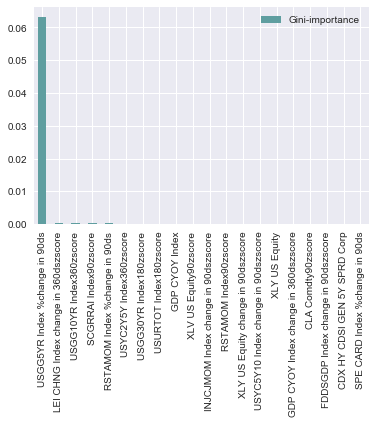

In [44]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, tree.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances[:20]
importances.sort_values(by='Gini-importance', ascending=False).plot(kind='bar', rot=90, color='cadetblue')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calculate_vif_(d, thresh=5.0):
    variables = d.columns
    dropped=True
    while dropped:
        dropped=False
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(d[variables].values, i) for i in range(d[variables].shape[1])]
        vif["features"] = d[variables].columns
        v=vif[vif["VIF Factor"]>thresh]
        
        if len(v) > 0:
            maxloc = v.iloc[len(v)-1]['features']
            print('dropping \'' + maxloc) 
            variables=variables.drop(maxloc)
            dropped=True

    print('Remaining variables:')
    print(d.columns)
    return d[variables]

X1 = calculate_vif_(X, thresh=5.0)

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'XLB US Equity change in 360dszscore


In [ ]:
X_train2 = X_train[X1.columns]
X_test2 = X_test[X1.columns]
X_train2.head(1)

In [ ]:
#try Lasso regression

from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.)
lasso.fit(X_train2, y_train)
lasso_pred = lasso.predict(X_test2)
lasso.score(X_test2,lasso_pred)
lasso_pred